<a href="https://colab.research.google.com/github/TejasC6/Finding-Exoplanets-using-Object-Detection/blob/main/YOLOv5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Object Detection YOLOv5**

In [ ]:
# !pip install imageai
!pip install tensorflow

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt # install dependencies
%pip install -q roboflow

import torch
import os
from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Cloning into 'yolov5'...
remote: Enumerating objects: 12262, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 12262 (delta 2), reused 6 (delta 1), pack-reused 12250
Receiving objects: 100% (12262/12262), 11.96 MiB | 32.67 MiB/s, done.
Resolving deltas: 100% (8488/8488), done.
/content/yolov5
     |████████████████████████████████| 596 kB 32.3 MB/s 
     |████████████████████████████████| 145 kB 52.1 MB/s 
     |████████████████████████████████| 178 kB 66.9 MB/s 
     |████████████████████████████████| 1.1 MB 55.4 MB/s 
     |████████████████████████████████| 67 kB 7.5 MB/s 
     |████████████████████████████████| 54 kB 3.2 MB/s 
     |████████████████████████████████| 138 kB 76.8 MB/s 
     |████████████████████████████████| 62 kB 1.7 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-c

In [ ]:
!pip install roboflow

In [ ]:
import os
os.environ["DATASET_DIRECTORY"] = "/content/datasets"

In [ ]:
# from roboflow import Roboflow
# rf = Roboflow(api_key="aEzuyqqVRmImL0bEhEAR")
# project = rf.workspace("n-ontfh").project("lccc")
# dataset = project.version(5).download("yolov5")

from roboflow import Roboflow
rf = Roboflow(api_key="aEzuyqqVRmImL0bEhEAR")
project = rf.workspace("n-ontfh").project("lccc")
dataset = project.version(5).download("yolov5")

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to /content/datasets/lccc-5 in yolov5pytorch:: 100%|██████████| 414/414 [00:00<00:00, 944.45it/s]


In [ ]:
%pip install -q wandb
import wandb
wandb.login()

     |████████████████████████████████| 1.8 MB 16.1 MB/s 
     |████████████████████████████████| 145 kB 53.1 MB/s 
     |████████████████████████████████| 181 kB 68.1 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 


<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
!python /content/yolov5/train.py --img 640 --batch 10 --epochs 100 --data {dataset.location}/data.yaml --weights yolov5s.pt --cache

wandb: Currently logged in as: navneet_kanna. Use `wandb login --relogin` to force relogin
train: weights=yolov5s.pt, cfg=, data=/content/datasets/lccc-5/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=10, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-258-g1156a32 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, c

In [ ]:
!python /content/yolov5/detect.py --weights /content/yolov5/runs/train/exp/weights/best.pt --img 640 --conf 0.1 --source {dataset.location}/test/images

detect: weights=['/content/yolov5/runs/train/exp/weights/best.pt'], source=/content/datasets/lccc-5/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-258-g1156a32 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 213 layers, 7012822 parameters, 0 gradients
p1 (218, 274) p2 (229, 518)
p1 (489, 281) p2 (501, 508)
p1 (421, 273) p2 (432, 530)
p1 (286, 272) p2 (296, 518)
image 1/20 /content/datasets/lccc-5/test/images/train101_8_png.rf.b3a441f417f3b0449d2960354c06dbe4.jpg: 640x640 4 Dips, Done. (0.013s)
p1 (394, 219) p2 (406, 508)
p1 (257, 219) p2 (268, 512)
p1 (441, 218) p2 (452, 510)
p1 (304, 2

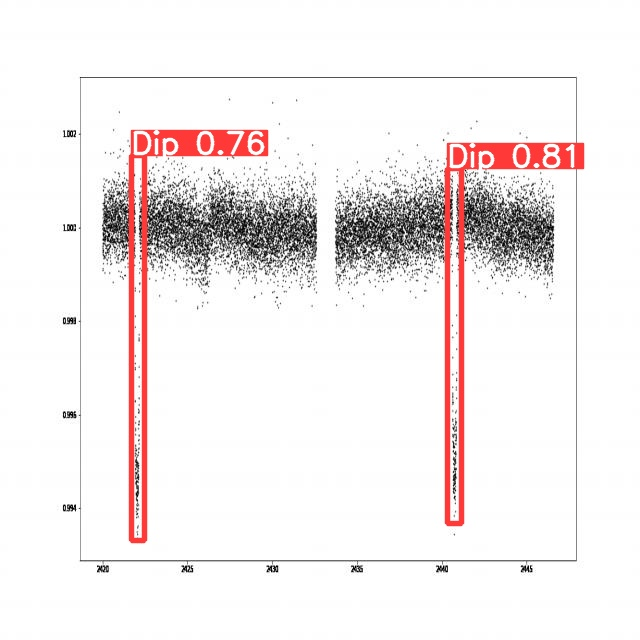

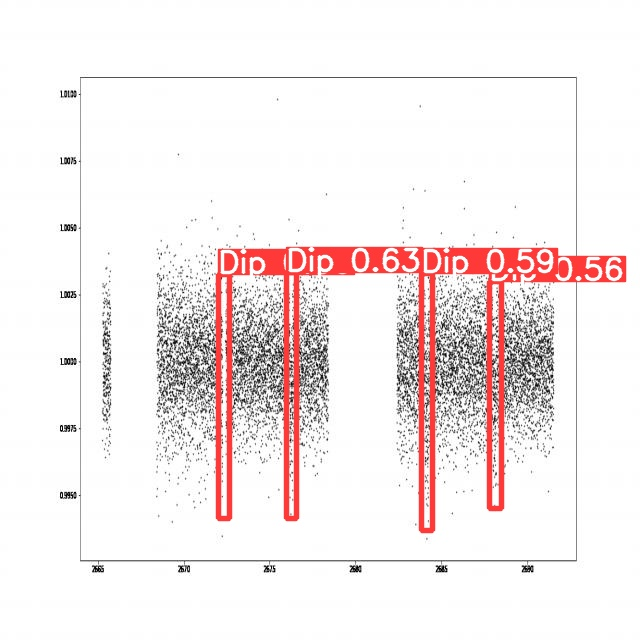

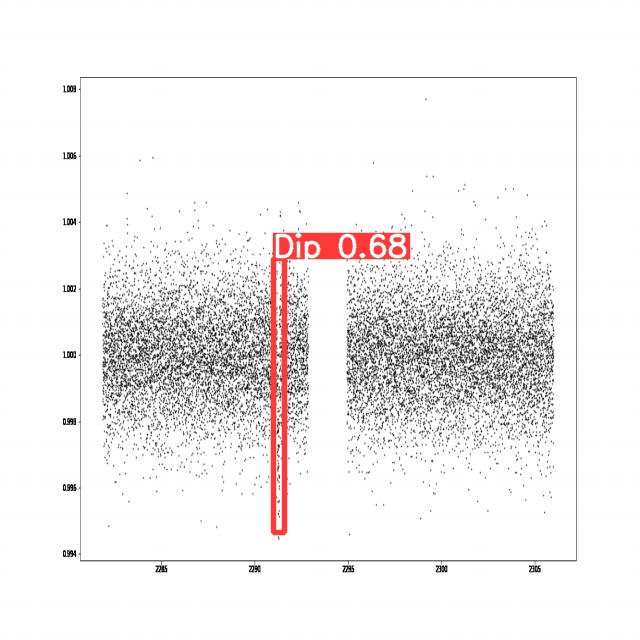

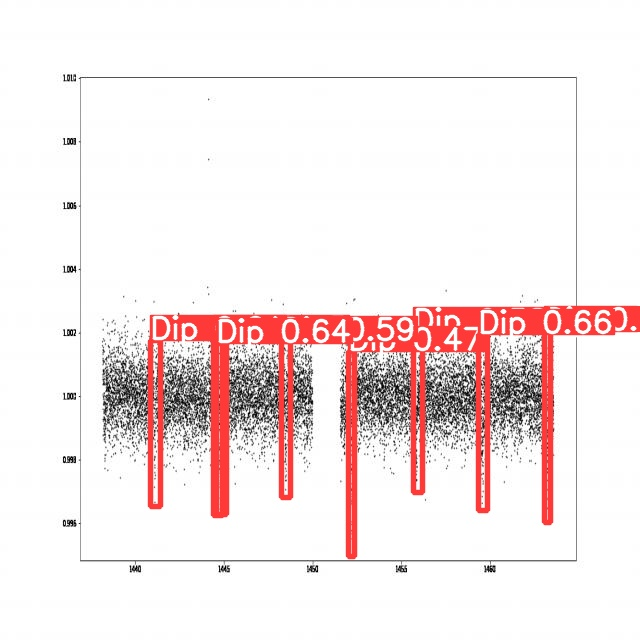

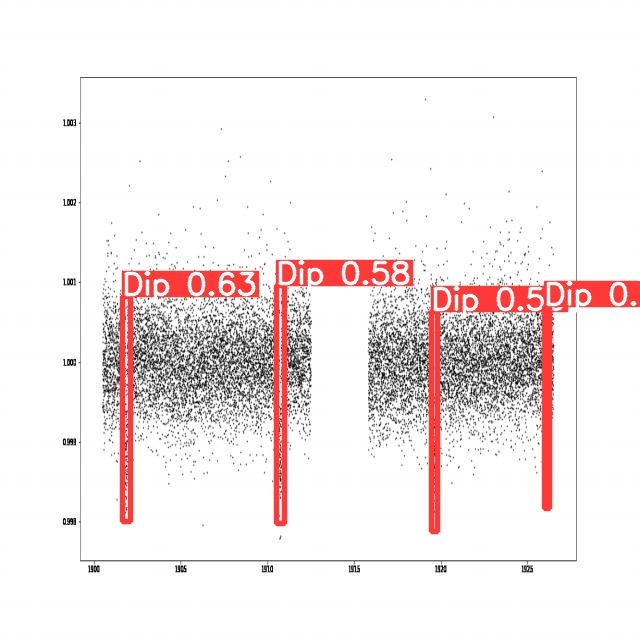

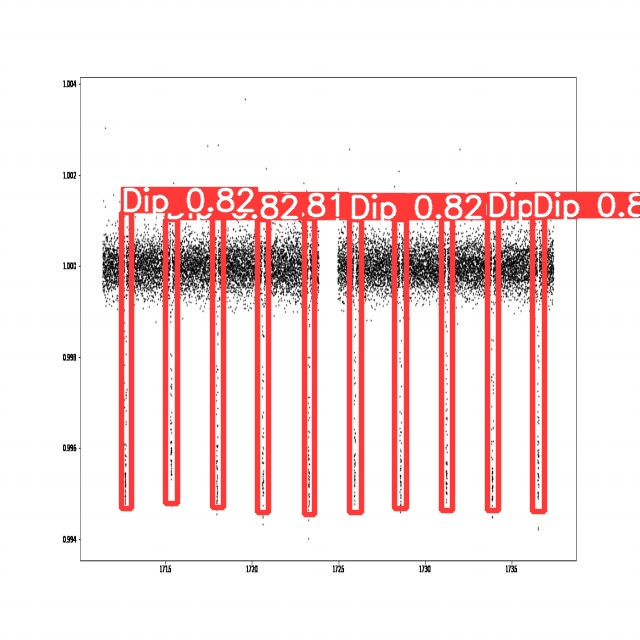

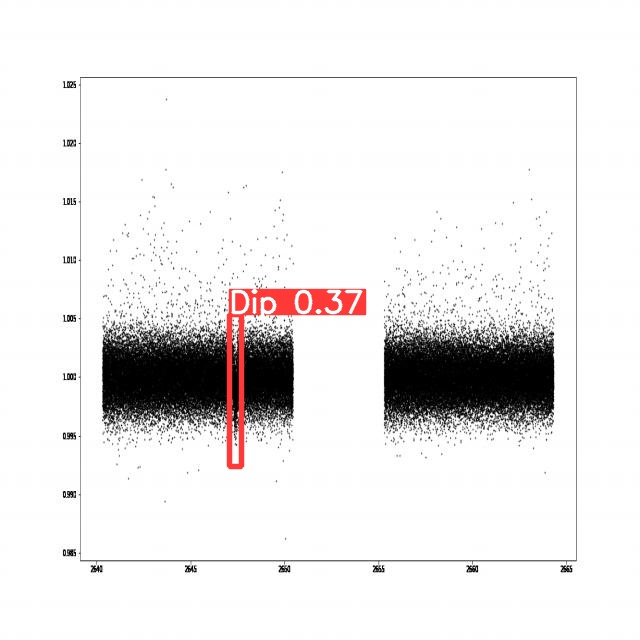

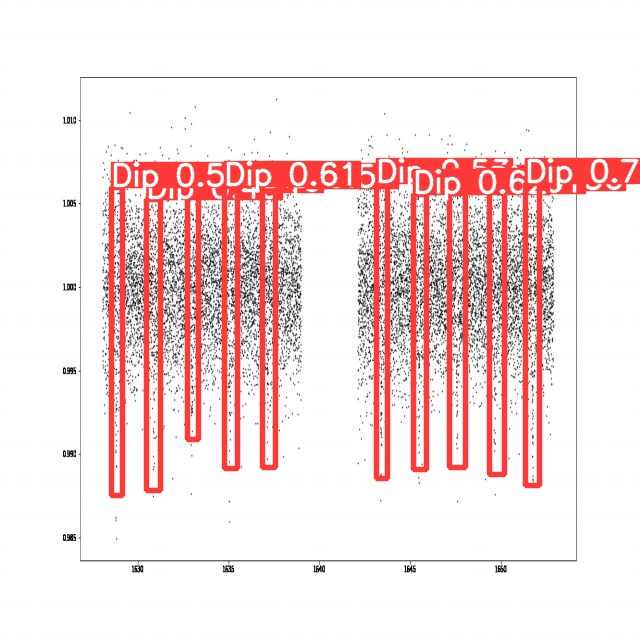

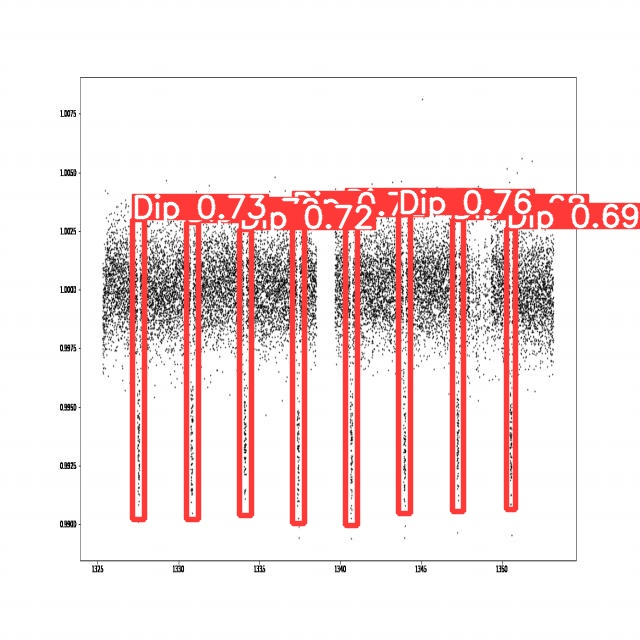

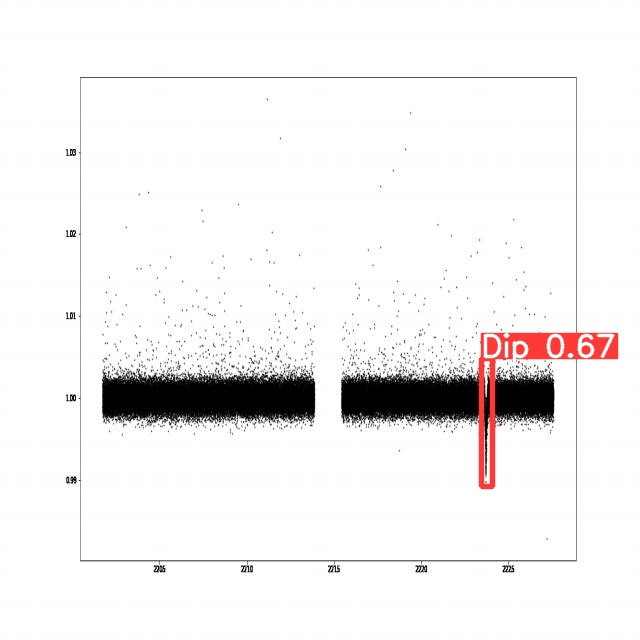

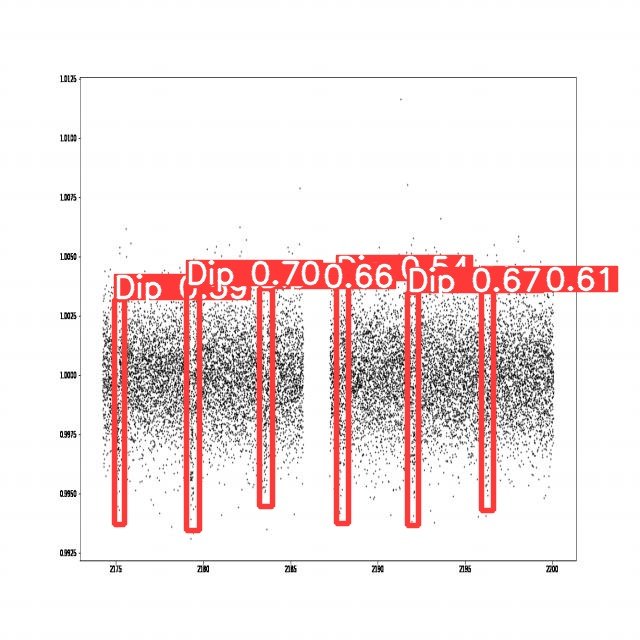

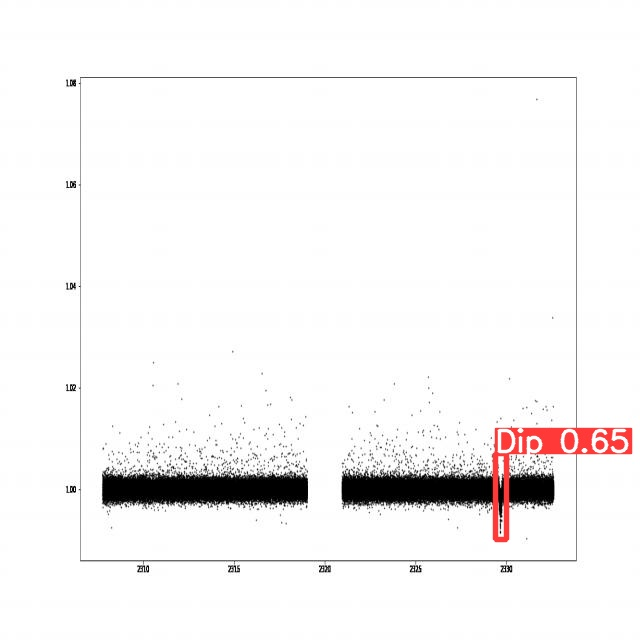

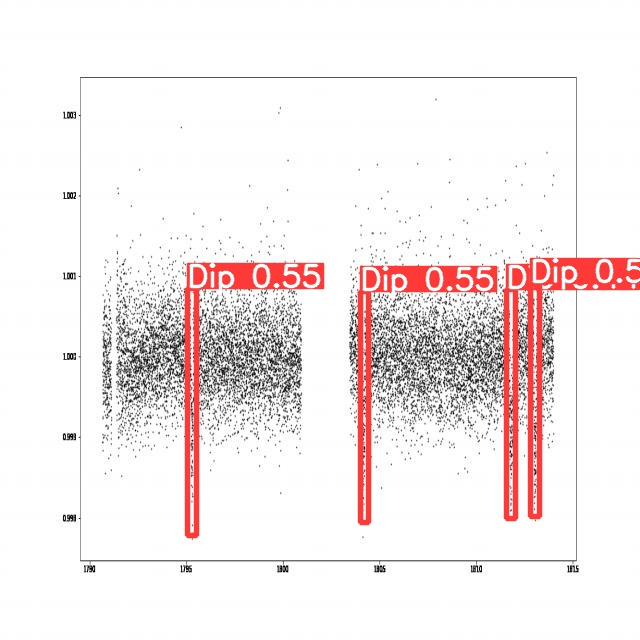

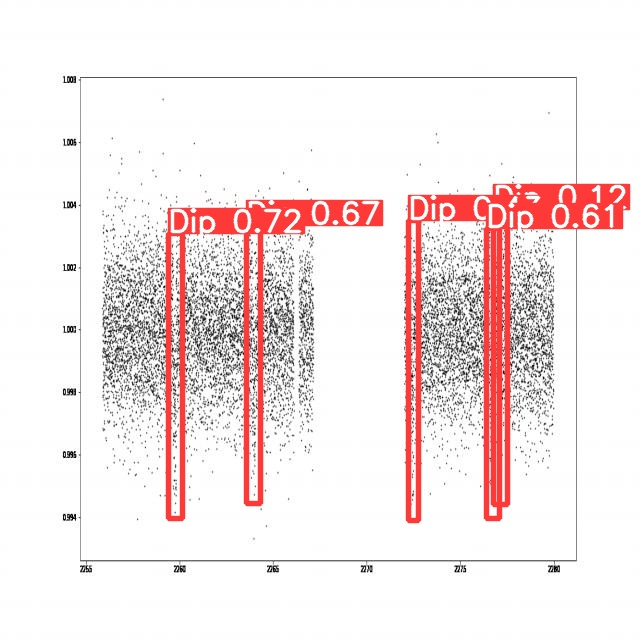

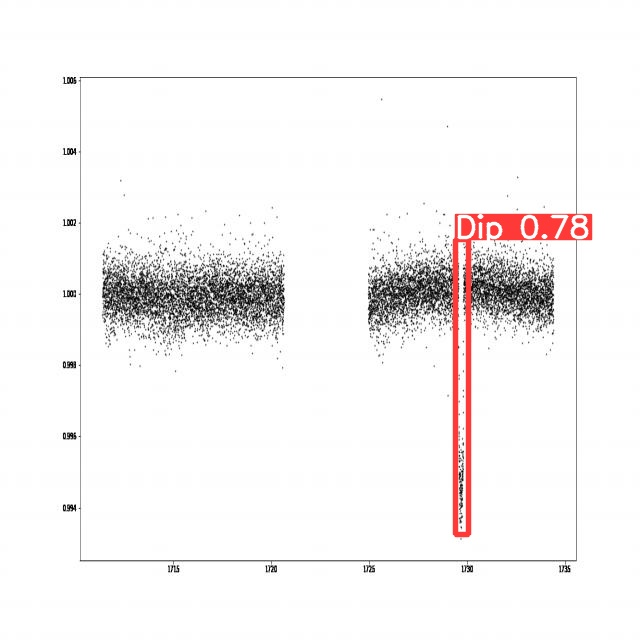

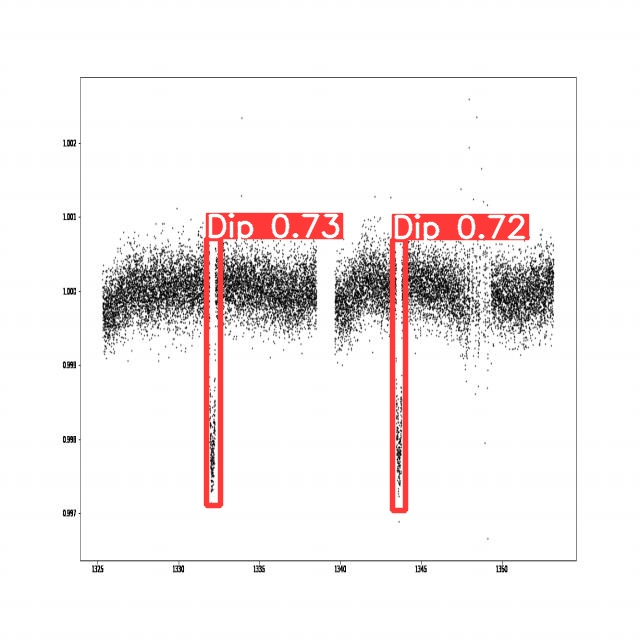

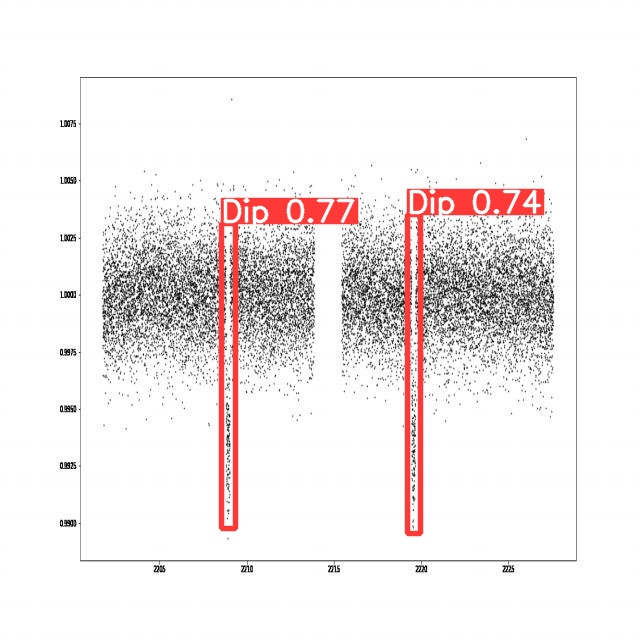

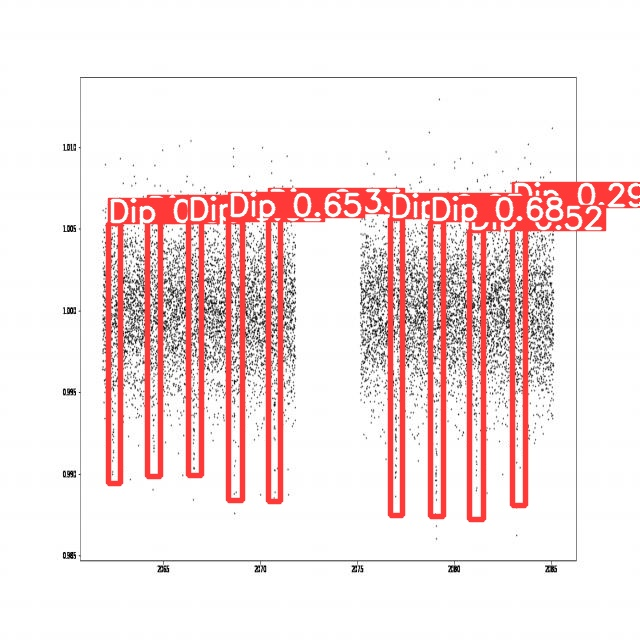

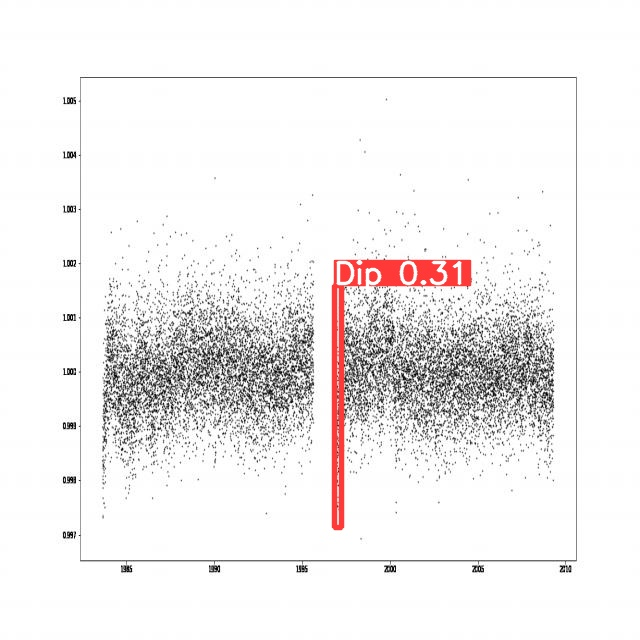

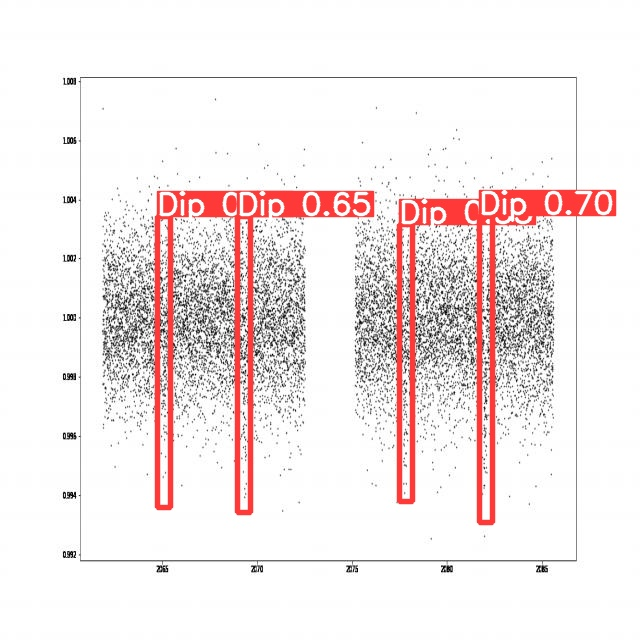

In [ ]:
import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp8/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")